In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.shape

(101, 26)

In [5]:
df = df.sort_values(by=['Label'])

In [6]:
df.head()

,# likelyhood,breach,trade,evidence,property,public,opponents,constitution,fiduciary,confusion,...,constitutional,unregistered,contract,drugs,proprietor,similar,penalty,company,criminal,Label
100,0,2,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,-1
72,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-1
71,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,-1
70,0,2,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,2,0,-1
69,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,3,-1


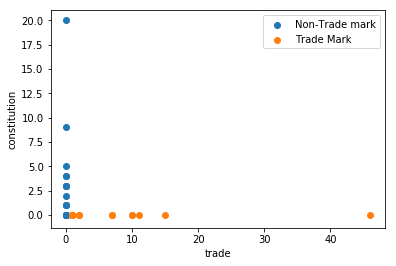

In [7]:
plt.scatter(df[:50].trade, df[:50].constitution, label='Non-Trade mark')
plt.scatter(df[50:].trade, df[50:].constitution, label='Trade Mark')
plt.xlabel('trade')
plt.ylabel('constitution')
plt.legend(loc='best')

In [8]:
X = df.drop(labels=['Label'], axis=1).values
Y = df.Label.values

In [9]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [10]:
trainIndex = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [11]:
testIndex = np.array(list(set(range(len(X))) - set(trainIndex)))
trainX = X[trainIndex]
trainY = Y[trainIndex]
testX = X[testIndex]
testY = Y[testIndex]

In [12]:
W = tf.Variable(tf.random_normal(shape=[25, 1]), name='W')
b = tf.Variable(tf.random_normal(shape=[1, 1]), name= 'b')
init = tf.global_variables_initializer()

In [13]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 25])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [14]:
model = tf.matmul(data, W) + b

In [15]:
# l2 norm
l2_norm = tf.reduce_sum(tf.square(W))

In [16]:
# loss function
alpha = tf.constant([0.01])
# margin term in loss
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model, target))))
# loss
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [17]:
prediction = tf.sign(model)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, target), tf.float32))

In [18]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
goal = optimizer.minimize(loss)

In [19]:
batch_size = 10
iter_num = 500

In [20]:
loss_trace = []
train_acc = []
test_acc = []

In [21]:
sess = tf.Session()
sess.run(init)

In [22]:
for epoch in range(iter_num):
    batchIndex = np.random.choice(len(trainX), size=batch_size)
    batchTrainX = trainX[batchIndex]
    batchTrainY = np.matrix(trainY[batchIndex]).T
    sess.run(goal, feed_dict={data: batchTrainX, target: batchTrainY})

    temp_loss = sess.run(loss, feed_dict={data: batchTrainX, target: batchTrainY})
    temp_train_acc = sess.run(accuracy, feed_dict={data: trainX, target: np.matrix(trainY).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: testX, target: np.matrix(testY).T})
    
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

    if (epoch + 1) % 30 == 0:
        print('{:d} Epoch: (loss: {:s} train_acc: {:s} test_acc: {:s})'.format(epoch + 1, str(temp_loss), str(temp_train_acc), str(temp_test_acc)))

30 Epoch: (loss: [0.4893803] train_acc: 0.8148148 test_acc: 0.8)
60 Epoch: (loss: [0.50347364] train_acc: 0.8271605 test_acc: 0.8)
90 Epoch: (loss: [0.6486537] train_acc: 0.8271605 test_acc: 0.8)
120 Epoch: (loss: [0.41108638] train_acc: 0.91358024 test_acc: 0.95)
150 Epoch: (loss: [0.35478973] train_acc: 0.91358024 test_acc: 0.95)
180 Epoch: (loss: [0.9782067] train_acc: 0.91358024 test_acc: 0.95)
210 Epoch: (loss: [0.40627164] train_acc: 0.962963 test_acc: 1.0)
240 Epoch: (loss: [0.32119757] train_acc: 0.962963 test_acc: 1.0)
270 Epoch: (loss: [0.32924223] train_acc: 1.0 test_acc: 1.0)
300 Epoch: (loss: [0.29524398] train_acc: 1.0 test_acc: 1.0)
330 Epoch: (loss: [0.39147437] train_acc: 1.0 test_acc: 1.0)
360 Epoch: (loss: [0.22143409] train_acc: 1.0 test_acc: 1.0)
390 Epoch: (loss: [0.38434952] train_acc: 1.0 test_acc: 1.0)
420 Epoch: (loss: [0.33562526] train_acc: 1.0 test_acc: 1.0)
450 Epoch: (loss: [0.2684394] train_acc: 1.0 test_acc: 1.0)
480 Epoch: (loss: [0.3125349] train_acc:

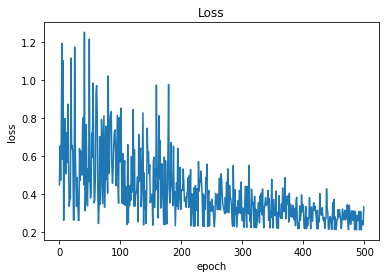

In [23]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

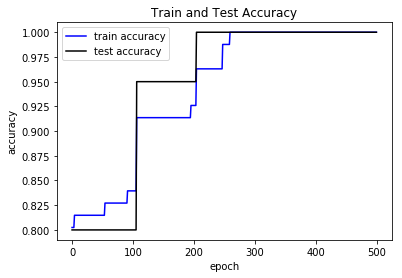

In [24]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
sess.run(W)

In [ ]:
sess.run(b)